In [193]:
import pandas as pd
import numpy as np
import glob
from IPython.display import display_html

In [194]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [195]:
names = pd.read_csv('data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


### appending new rows with loc method
### this updates the dataframe inpace

In [196]:
names.index

RangeIndex(start=0, stop=4, step=1)

In [197]:
new_data_list = ['Aria', 10]

In [198]:
names.loc[4] = new_data_list

In [199]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,10


In [200]:
names.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [201]:
names.loc[6] = ['Elon', 45]

In [202]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,10
6,Elon,45


In [203]:
names.index

Int64Index([0, 1, 2, 3, 4, 6], dtype='int64')

In [204]:
names.loc['Five'] = ['Steve', 34]

In [205]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,10
6,Elon,45
Five,Steve,34


In [206]:
names.index

Index([0, 1, 2, 3, 4, 6, 'Five'], dtype='object')

In [207]:
new_data = {'Name': 'Poll', 'Age': 34}
names.loc[len(names)] = new_data

In [208]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,10
6,Elon,45
Five,Steve,34
7,Poll,34


In [209]:
new_data_in_series = pd.Series({'Name': 'Dean', 'Age':43})

In [210]:
new_data_in_series

Name    Dean
Age       43
dtype: object

In [211]:
names.loc[len(names)] = new_data_in_series

In [212]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,10
6,Elon,45
Five,Steve,34
7,Poll,34
8,Dean,43


In [213]:
names.index

Index([0, 1, 2, 3, 4, 6, 'Five', 7, 8], dtype='object')

### adding the rows using append (new df returned, no inplace update)

In [214]:
names = pd.read_csv('data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [215]:
try:
    names.append({'Name' : 'Elon', 'Age' : 45})
except TypeError as e:
    e

TypeError('Can only append a dict if ignore_index=True')

In [216]:
names.append({'Name' : 'Elon', 'Age' : 45}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Elon,45


In [217]:
names.index

RangeIndex(start=0, stop=4, step=1)

In [218]:
names.index = ['Canada', 'Usa', 'india', 'UK']

In [219]:
names.append({'Name' : 'Steve', 'Age' : 45}, ignore_index=True)

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Steve,45


In [220]:
names.index

Index(['Canada', 'Usa', 'india', 'UK'], dtype='object')

In [221]:
names

,Name,Age
Canada,Cornelia,70
Usa,Abbas,69
india,Penelope,4
UK,Niko,2


In [222]:
new_names = names.append({'Name' : 'Steve', 'Age' : 45}, ignore_index=True)

In [223]:
new_names.index  # drops back to range index due to ignore_index

RangeIndex(start=0, stop=5, step=1)

In [224]:
row_item = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))

In [225]:
row_item

Name    Zach
Age        3
Name: 4, dtype: object

In [226]:
names.append(row_item)  # index is preserved now.

,Name,Age
Canada,Cornelia,70
Usa,Abbas,69
india,Penelope,4
UK,Niko,2
4,Zach,3


In [227]:
row_item

Name    Zach
Age        3
Name: 4, dtype: object

In [228]:
row_item_1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
row_item_2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')

In [229]:
names.append([row_item_1, row_item_2])

,Name,Age
Canada,Cornelia,70
Usa,Abbas,69
india,Penelope,4
UK,Niko,2
4,Zach,3
USA,Zayd,2


In [230]:
bball_16 = pd.read_csv('data/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [231]:
data_dict = bball_16.iloc[0].to_dict()

In [232]:
data_dict

{'playerID': 'altuvjo01',
 'yearID': 2016,
 'stint': 1,
 'teamID': 'HOU',
 'lgID': 'AL',
 'G': 161,
 'AB': 640,
 'R': 108,
 'H': 216,
 '2B': 42,
 '3B': 5,
 'HR': 24,
 'RBI': 96.0,
 'SB': 30.0,
 'CS': 10.0,
 'BB': 60,
 'SO': 70.0,
 'IBB': 11.0,
 'HBP': 7.0,
 'SH': 3.0,
 'SF': 7.0,
 'GIDP': 15.0}

In [233]:
new_data_dict = {k: '' if isinstance(v, str) else
                    np.nan for k, v in data_dict.items()}

In [234]:
new_data_dict # can be used a template to add any new rows

{'playerID': '',
 'yearID': nan,
 'stint': nan,
 'teamID': '',
 'lgID': '',
 'G': nan,
 'AB': nan,
 'R': nan,
 'H': nan,
 '2B': nan,
 '3B': nan,
 'HR': nan,
 'RBI': nan,
 'SB': nan,
 'CS': nan,
 'BB': nan,
 'SO': nan,
 'IBB': nan,
 'HBP': nan,
 'SH': nan,
 'SF': nan,
 'GIDP': nan}

### performance check
### appending list of Series at a time vs each series in a loop

In [235]:
random_data = []

In [236]:
for i in range(1000):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v, str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append(pd.Series(d, name=i + len(bball_16)))

In [237]:
type(random_data[0])  ## list of series, each one will be row in the df

pandas.core.series.Series

In [238]:
random_data[1].head(4)

playerID    a
yearID      7
stint       0
teamID      c
Name: 17, dtype: object

### Appending each row takes more time

In [239]:
%%timeit
bball_16_new = bball_16.copy()
for item_row in random_data:
    bball_16_new = bball_16_new.append(item_row)

3.07 s ± 14.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### when total list of series is given, pandas will append all at once

In [240]:
%%timeit
bball_16_new = bball_16.copy()
bball_16_new = bball_16_new.append(random_data)

37.6 ms ± 598 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Concating mutltiple DataFrames

In [241]:
stocks_2016 = pd.read_csv('data/stocks_2016.csv',index_col='Symbol')
stocks_2017 = pd.read_csv('data/stocks_2017.csv',index_col='Symbol')

In [242]:
stocks_2016.head()

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [243]:
stocks_2017.head()

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23


In [244]:
s_list = [stocks_2016, stocks_2017]

In [245]:
pd.concat(s_list)  # all mixed,we dont know which data came from which df

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [246]:
pd.concat(s_list, 
            keys=['2016', '2017'], 
            names=['Year', 'Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [247]:
pd.concat(s_list, 
              keys=['2016', '2017'],
              axis='columns', 
              names=['Year', None])

Year     2016                2017              
       Shares   Low   High Shares    Low   High
Symbol                                         
AAPL     80.0  95.0  110.0   50.0  120.0  140.0
TSLA     50.0  80.0  130.0  100.0  100.0  300.0
WMT      40.0  55.0   70.0    NaN    NaN    NaN
GE        NaN   NaN    NaN  100.0   30.0   40.0
IBM       NaN   NaN    NaN   87.0   75.0   95.0
SLB       NaN   NaN    NaN   20.0   55.0   85.0
TXN       NaN   NaN    NaN  500.0   15.0   23.0

In [248]:
pd.concat(s_list, 
              keys=['2016', '2017'],
              axis='columns', 
              join='inner', # default outer join is considered.
              names=['Year', None])  

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

### Concat vs Join vs Merge

In [249]:
years = [2016, 2017, 2018]

In [250]:
stock_tables = [pd.read_csv('data/stocks_{}.csv'.format(year)) for year in years]

In [251]:
def display_frames(frames, num_spaces=0):
    """
    To display all Data frames in a single row
    """
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style) 
                   for df in frames]

    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

In [252]:
display_frames(stock_tables)

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [253]:
stocks_2016, stocks_2017, stocks_2018 = stock_tables

In [254]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Symbol  Shares  Low  High
2016 0   AAPL      80   95   110
     1   TSLA      50   80   130
     2    WMT      40   55    70
2017 0   AAPL      50  120   140
     1     GE     100   30    40
     2    IBM      87   75    95
     3    SLB      20   55    85
     4    TXN     500   15    23
     5   TSLA     100  100   300
2018 0   AAPL      40  135   170
     1   AMZN       8  900  1125
     2   TSLA      50  220   400

In [255]:
stocks_concat = pd.concat(dict(zip(years, stock_tables)), axis='columns')

In [256]:
display_frames(stock_tables)

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


#### using join method

In [257]:
display_frames([stocks_2016, stocks_2017])

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [258]:
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2017,Shares_2017,Low_2017,High_2017
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140
1,TSLA,50.0,80.0,130.0,GE,100,30,40
2,WMT,40.0,55.0,70.0,IBM,87,75,95
3,NaN,NaN,NaN,NaN,SLB,20,55,85
4,NaN,NaN,NaN,NaN,TXN,500,15,23
5,NaN,NaN,NaN,NaN,TSLA,100,100,300


In [259]:
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='inner')  # inner join

,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2017,Shares_2017,Low_2017,High_2017
0,AAPL,80,95,110,AAPL,50,120,140
1,TSLA,50,80,130,GE,100,30,40
2,WMT,40,55,70,IBM,87,75,95


In [260]:
display_frames([stocks_2016.add_suffix('_2016'),
               stocks_2017.add_suffix('_2017'),
               stocks_2018.add_suffix('_2018')])

,Symbol_2016,Shares_2016,Low_2016,High_2016
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
,Symbol_2017,Shares_2017,Low_2017,High_2017
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [261]:
stocks_2016_suffix = stocks_2016.add_suffix('_2016')
stocks_2017_suffix = stocks_2017.add_suffix('_2017')
stocks_2018_suffix = stocks_2018.add_suffix('_2018')

In [262]:
stocks_joined = stocks_2016_suffix \
                    .join([stocks_2017_suffix, stocks_2018_suffix], how="outer")

In [263]:
stocks_concat.equals(stocks_joined)  # with concat, the DF will have multilevel index column

False

In [264]:
stocks_concat

2016                       2017                    2018                \
  Symbol Shares   Low   High Symbol Shares  Low High Symbol Shares    Low   
0   AAPL   80.0  95.0  110.0   AAPL     50  120  140   AAPL   40.0  135.0   
1   TSLA   50.0  80.0  130.0     GE    100   30   40   AMZN    8.0  900.0   
2    WMT   40.0  55.0   70.0    IBM     87   75   95   TSLA   50.0  220.0   
3    NaN    NaN   NaN    NaN    SLB     20   55   85    NaN    NaN    NaN   
4    NaN    NaN   NaN    NaN    TXN    500   15   23    NaN    NaN    NaN   
5    NaN    NaN   NaN    NaN   TSLA    100  100  300    NaN    NaN    NaN   

           
     High  
0   170.0  
1  1125.0  
2   400.0  
3     NaN  
4     NaN  
5     NaN

In [265]:
level_1 = stocks_concat.columns.get_level_values(1)
level_2 = stocks_concat.columns.get_level_values(0).astype(str)

In [266]:
stocks_concat.columns = level_1 + '_' + level_2

In [267]:
stocks_concat

,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2017,Shares_2017,Low_2017,High_2017,Symbol_2018,Shares_2018,Low_2018,High_2018
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140,AAPL,40.0,135.0,170.0
1,TSLA,50.0,80.0,130.0,GE,100,30,40,AMZN,8.0,900.0,1125.0
2,WMT,40.0,55.0,70.0,IBM,87,75,95,TSLA,50.0,220.0,400.0
3,NaN,NaN,NaN,NaN,SLB,20,55,85,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,TXN,500,15,23,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,TSLA,100,100,300,NaN,NaN,NaN,NaN


In [268]:
stocks_concat.equals(stocks_joined)

True

### Using merge method

In [269]:
display_frames([stocks_2016, stocks_2017])

,Symbol,Shares,Low,High
0,AAPL,80,95,110
1,TSLA,50,80,130
2,WMT,40,55,70
,Symbol,Shares,Low,High
0,AAPL,50,120,140
1,GE,100,30,40
2,IBM,87,75,95
3,SLB,20,55,85
4,TXN,500,15,23
5,TSLA,100,100,300


In [270]:
stocks_2016.merge(stocks_2017, left_index=True, right_index=True)

,Symbol_x,Shares_x,Low_x,High_x,Symbol_y,Shares_y,Low_y,High_y
0,AAPL,80,95,110,AAPL,50,120,140
1,TSLA,50,80,130,GE,100,30,40
2,WMT,40,55,70,IBM,87,75,95


In [271]:
step1 = stocks_2016.merge(stocks_2017, left_index=True, 
                              right_index=True, how='outer',
                              suffixes=('_2016', '_2017'))

In [272]:
step1

,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2017,Shares_2017,Low_2017,High_2017
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140
1,TSLA,50.0,80.0,130.0,GE,100,30,40
2,WMT,40.0,55.0,70.0,IBM,87,75,95
3,NaN,NaN,NaN,NaN,SLB,20,55,85
4,NaN,NaN,NaN,NaN,TXN,500,15,23
5,NaN,NaN,NaN,NaN,TSLA,100,100,300


In [273]:
stocks_merge = step1.merge(stocks_2018.add_suffix('_2018'),
                            left_index=True, right_index=True,
                        how='outer')

In [274]:
stocks_merge

,Symbol_2016,Shares_2016,Low_2016,High_2016,Symbol_2017,Shares_2017,Low_2017,High_2017,Symbol_2018,Shares_2018,Low_2018,High_2018
0,AAPL,80.0,95.0,110.0,AAPL,50,120,140,AAPL,40.0,135.0,170.0
1,TSLA,50.0,80.0,130.0,GE,100,30,40,AMZN,8.0,900.0,1125.0
2,WMT,40.0,55.0,70.0,IBM,87,75,95,TSLA,50.0,220.0,400.0
3,NaN,NaN,NaN,NaN,SLB,20,55,85,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,TXN,500,15,23,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,TSLA,100,100,300,NaN,NaN,NaN,NaN


In [275]:
stocks_concat.equals(stocks_merge)

True

In [276]:
stocks_merge.equals(stocks_joined)

True

### Using merge to combine the column values

In [277]:
names = ['prices', 'transactions']

In [278]:
food_tables = [pd.read_csv('data/food_{}.csv'.format(name)) 
                    for name in names]

In [279]:
food_prices, food_transactions = food_tables

In [280]:
display_frames(food_tables)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [281]:
food_transactions.merge(food_prices, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,steak,B,1,6.99,2017
5,2,steak,B,1,4.99,2015
6,2,pear,B,1,1.99,2017
7,2,peach,B,2,3.49,2017


In [282]:
final_merge = food_transactions.merge(food_prices.query('Date == 2017'),
                            how='left')

###  using Join method to merge the columns values

In [283]:
food_prices_join = food_prices.query('Date == 2017') \
                                .set_index(['item', 'store'])

In [284]:
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [285]:
final_join = food_transactions.join(
                            food_prices_join, on = ['item', 'store'])

In [286]:
final_join.equals(final_merge)

True

#### cannot do this same with concat, as concat dont allow dulicate Index value

In [287]:
try:
    pd.concat([food_transactions.set_index(['item', 'store']), 
                   food_prices.set_index(['item', 'store'])],
                  axis='columns')
except ValueError as e:
    e

ValueError('Reindexing only valid with uniquely valued Index objects')

In [289]:
df_list = []
for filename in glob.glob('data/gas_prices/*'):
    df = pd.read_csv(filename, index_col='Week', parse_dates=['Week'])
    df_list.append(df)

In [292]:
df_list[0].head(3)

,Midgrade
Week,
2017-09-25,2.859
2017-09-18,2.906
2017-09-11,2.953


In [294]:
gas_prices = pd.concat(df_list, axis='columns')

In [295]:
gas_prices.head(3)

,Midgrade,Premium,Diesel,All Grades,Regular
Week,,,,,
2017-09-25,2.859,3.105,2.788,2.701,2.583
2017-09-18,2.906,3.151,2.791,2.750,2.634
2017-09-11,2.953,3.197,2.802,2.800,2.685


<AxesSubplot:xlabel='Week'>

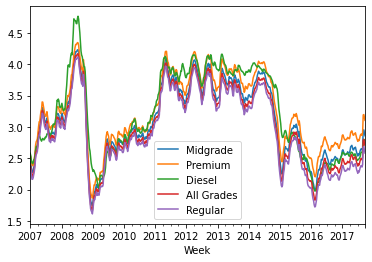

In [297]:
gas_prices.plot()  ## all dataframes